* 2D图像实施低通滤波（LPF）和高通滤波（HPF）。LPF用于去除噪音，模糊图像，HPF用于找到图像的边缘。
* OpenCV提供的函数cv.filter2D()可以对一幅图像进行卷积操作。

In [1]:
import cv2
import numpy as np
import SimpleITK as sitk
from matplotlib import pyplot as plt
from scipy import ndimage
filename = r'data/CTs/2/body.nii'
ct2 = sitk.ReadImage(filename)
ct2_array = sitk.GetArrayFromImage(ct2).astype('float32')

In [2]:
ct2_array.shape

(61, 512, 512)

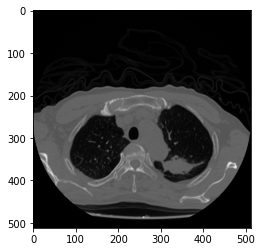

In [3]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
plt.imshow(img, cmap='gray')
plt.show()

## 2D卷积

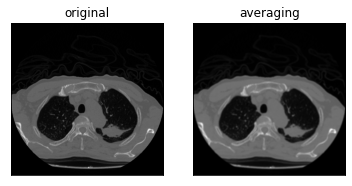

In [5]:
kernel = np.ones((5,5),np.float32)/25

#cv.Filter2D(src, dst, kernel, anchor=(-1, -1))
#ddepth –desired depth of the destination image;
#if it is negative, it will be the same as src.depth();
#the following combinations of src.depth() and ddepth are supported:
#src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
#src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_64F, ddepth = -1/CV_64F
#when ddepth=-1, the output image will have the same depth as the source.

dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap='gray'),plt.title('averaging')
plt.xticks([]),plt.yticks([])
plt.show()

## 平均

可以使用cv2.blur()和cv2.boxFilter()来实现， 我们需要设定卷积框的宽和高。

In [6]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
blur = cv2.blur(img,(5,5))

while(1):
    cv2.imshow('image',img)
    cv2.imshow('blur',blur)
    k=cv2.waitKey(1)
    if k == ord('q'):#按q键退出
        break
cv2.destroyAllWindows()

## 高斯模糊

In [ ]:
# 0是指根据窗口大小（5,5）来计算高斯函数标准差
blur = cv2.GaussianBlur(img,(5,5),0)

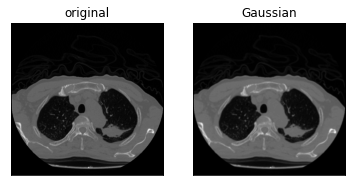

In [7]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Gaussian')
plt.xticks([]),plt.yticks([])
plt.show()

## 中值模糊

是用与卷积框对应像素的中值来替代中心像素的值，这个滤波器经常用来去除椒盐噪声。

卷积核的大小也应该是一个奇数。

In [ ]:
median = cv2.medianBlur(img,5)

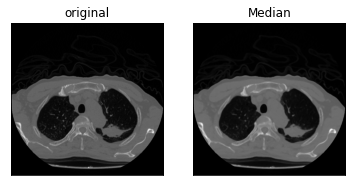

In [9]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(median, cmap='gray'),plt.title('Median')
plt.xticks([]),plt.yticks([])
plt.show()

## 双边滤波

函数cv2.bilateralFilter()能在保持边界清晰的情况下有效的去除噪音，但比较慢

In [ ]:
#cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
#d – Diameter of each pixel neighborhood that is used during filtering. # If it is non-positive, it is computed from sigmaSpace 
# 9 邻域直径，两个 75 分别是空间高斯函数标准差，灰度值相似性高斯函数标准差 
blur = cv2.bilateralFilter(img,9,75,75)

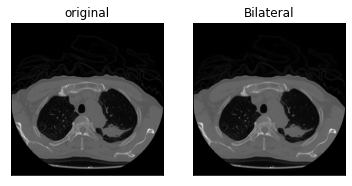

In [10]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Bilateral')
plt.xticks([]),plt.yticks([])
plt.show()